In [33]:
from matplotlib.colors import ListedColormap
from sklearn import *
import sklearn
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn import cross_validation, datasets, metrics, neighbors
from sklearn.metrics import accuracy_score
from scipy import stats, optimize
from scipy.optimize import minimize, minimize_scalar
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
classification_problem = datasets.make_classification(n_samples=1000, n_features =2, n_informative = 2, 
                                                      n_classes = 4, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=5)

In [4]:
colors = ListedColormap(['red', 'blue', 'yellow', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow','lightgreen'])

In [5]:
def plot_2d_dataset(data, colors):
    plt.figure(figsize = (8, 8))
    plt.scatter(map(lambda x: x[0], data[0]), map(lambda x: x[1], data[0]), c = data[1], cmap = colors)

In [6]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [7]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

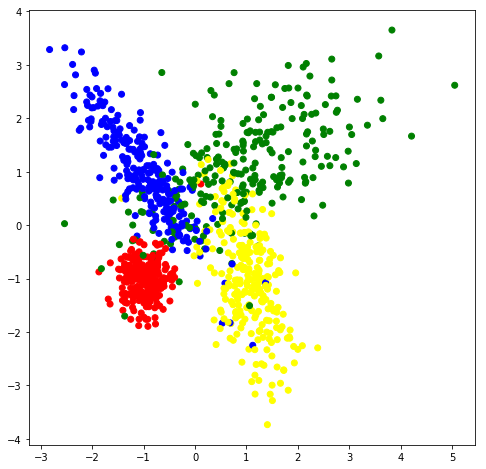

In [8]:
plot_2d_dataset(classification_problem, colors)

### Метод k ближайших соседей

In [9]:
X = np.array(classification_problem[0])
y = np.array(classification_problem[1])

In [10]:
print (X[:10])
print (y[:10])

[[-1.84802707  2.32803848]
 [ 1.37279142 -1.14204673]
 [ 0.86061979 -0.51799862]
 [-1.41548498 -1.28337401]
 [ 1.72556365 -2.7181229 ]
 [-0.24028297  1.05100034]
 [ 2.06693725  2.2385079 ]
 [ 1.06458738 -1.55420658]
 [ 0.30095071 -0.79717687]
 [-0.94826491 -1.52656865]]
[1 2 2 0 2 3 3 2 2 0]


In [11]:
results = []
for k in range(1, 30):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
    accuracy = []
    for train_indices, test_indices in cross_validation.KFold(1000, n_folds = 5):
        estimator.fit(X[train_indices], y[train_indices])
        accuracy.append(accuracy_score(estimator.predict(X[test_indices]), y[test_indices]))
    results.append(np.mean(accuracy))

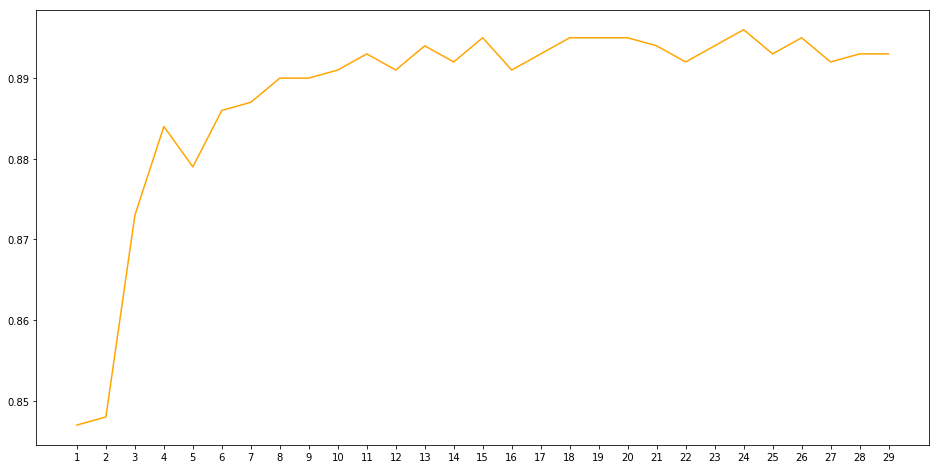

In [12]:
plt.figure(figsize=(16,8))
plt.plot(range(1, 30), results, color="orange")
plt.xticks(range(1,30), range(1,30), rotation='horizontal')
plt.show()

In [13]:
print "Лучшее качество: ", np.max(results)
print "Оптимальное количество k в kNN: ", np.argmax(results)+1 

Лучшее качество:  0.896
Оптимальное количество k в kNN:  24


Вот пример работы KNeighborsClassifier при k = 24 (зафиксировали разбиение на train и test и использовали 5NN для предсказания)

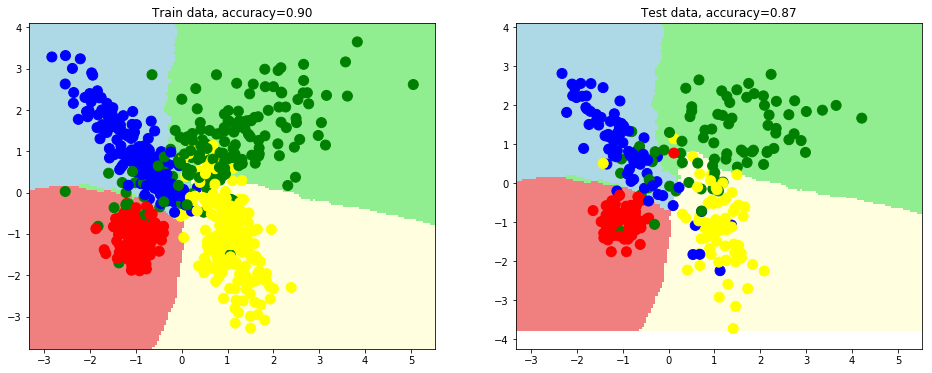

In [14]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=np.argmax(results)+1)
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

### Наивный байесовский классификатор

In [15]:
digits = sklearn.datasets.load_digits()
breast_cancer = sklearn.datasets.load_breast_cancer()

In [16]:
print digits.data
print digits.target
print digits.target_names

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[0 1 2 ..., 8 9 8]
[0 1 2 3 4 5 6 7 8 9]


In [17]:
print breast_cancer.data
print breast_cancer.target
print breast_cancer.target_names

[[  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02 ...,   1.86000000e-01
    2.75000000e-01   8.90200000e-02]
 [  1.96900000e+01   2.12500000e+01   1.30000000e+02 ...,   2.43000000e-01
    3.61300000e-01   8.75800000e-02]
 ..., 
 [  1.66000000e+01   2.80800000e+01   1.08300000e+02 ...,   1.41800000e-01
    2.21800000e-01   7.82000000e-02]
 [  2.06000000e+01   2.93300000e+01   1.40100000e+02 ...,   2.65000000e-01
    4.08700000e-01   1.24000000e-01]
 [  7.76000000e+00   2.45400000e+01   4.79200000e+01 ...,   0.00000000e+00
    2.87100000e-01   7.03900000e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1

In [18]:
bernNBclf = BernoulliNB()
multiNBclf = MultinomialNB()
gaussNBclf = GaussianNB()

In [19]:
bern_result_digits = np.mean(sklearn.model_selection.cross_val_score(bernNBclf, digits.data, digits.target))
multi_result_digits = np.mean(sklearn.model_selection.cross_val_score(multiNBclf, digits.data, digits.target))
gauss_result_digits = np.mean(sklearn.model_selection.cross_val_score(gaussNBclf, digits.data, digits.target))

In [20]:
print "Результат для датасета digits"
print "BernoulliNB: ", bern_result_digits
print "MultinomialNB: ", multi_result_digits
print "GaussianNB: ", gauss_result_digits

Результат для датасета digits
BernoulliNB:  0.825823650778
MultinomialNB:  0.870877148974
GaussianNB:  0.818600380355


In [21]:
bern_result_breast_cancer = np.mean(sklearn.model_selection.cross_val_score(bernNBclf, breast_cancer.data, breast_cancer.target))
multi_result_breast_cancer = np.mean(sklearn.model_selection.cross_val_score(multiNBclf, breast_cancer.data, breast_cancer.target))
gauss_result_breast_cancer = np.mean(sklearn.model_selection.cross_val_score(gaussNBclf, breast_cancer.data, breast_cancer.target))

In [22]:
print "Результат для датасета breast_cancer"
print "BernoulliNB: ", bern_result_breast_cancer
print "MultinomialNB: ", multi_result_breast_cancer
print "GaussianNB: ", gauss_result_breast_cancer

Результат для датасета breast_cancer
BernoulliNB:  0.627420402859
MultinomialNB:  0.894579040193
GaussianNB:  0.936749280609


Ответы на вопросы:
<ol>
<li> Лучшее качество классификации на датасете breast_cancer у GaussianNB (0.937)</li>
<li> Лучшее качество классификации на датасете digits у MultinomialNB (0.871) </li>
<li> верные утверждения c) и d) </li>
<ol>

### Метрики в задаче регрессии

In [23]:
N = 500
x = np.linspace(1, 50, num=N)
print x[:10]

[ 1.          1.09819639  1.19639279  1.29458918  1.39278557  1.49098196
  1.58917836  1.68737475  1.78557114  1.88376754]


In [24]:
y = 0.5 * x + 1 + np.random.normal(loc=0.0, scale=0.2, size=500)
print y[:10]

[ 1.75246657  1.75351589  1.93076867  1.67068826  1.78558657  1.4927208
  1.50349299  2.09574608  2.11469822  2.04056305]


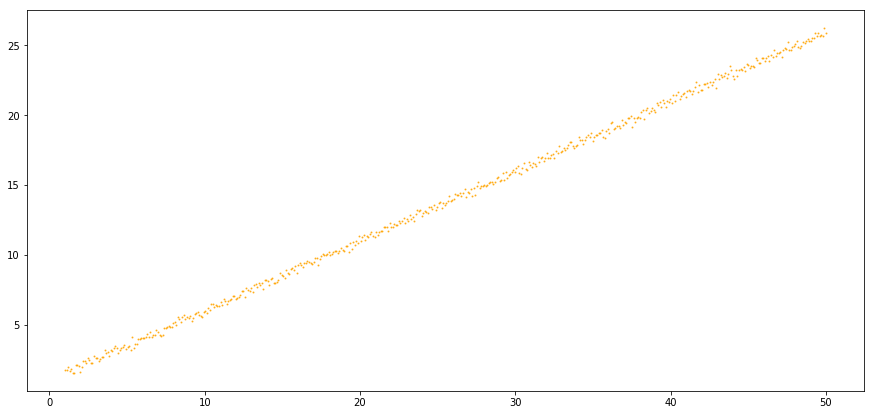

In [25]:
plt.figure(figsize=(15,7))
plt.scatter(x, y, s=1, alpha=0.75, color="orange")
plt.show()

In [37]:
def mse_fun(args):
    return metrics.mean_squared_error(args[0]*x+args[1], y)

In [38]:
def mae_fun(args):
    return metrics.mean_absolute_error(args[0]*x+args[1], y)

best parameters
k = 0.424670251232 
b = 0.98154211216


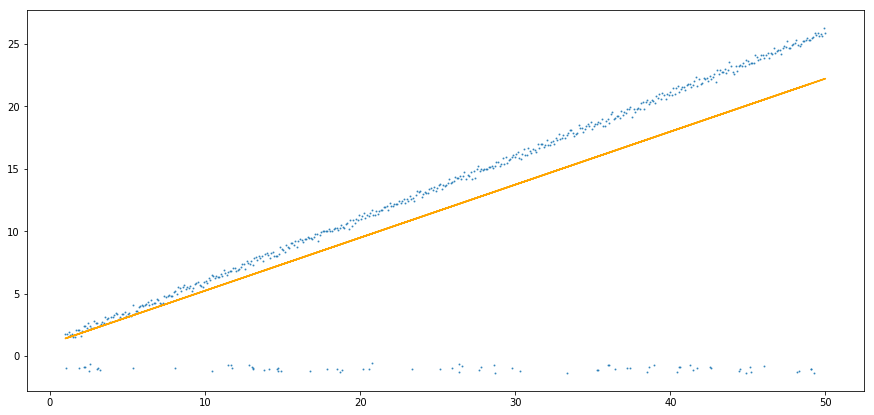

In [39]:
k, b = optimize.minimize(mse_fun, [0., 0.]).x
print "best parameters\n", "k =", k, "\nb =", b
y_pred = k * x + b
plt.figure(figsize=(15, 7))
plt.plot(x, y_pred, color = "orange")
plt.scatter(x, y, s=1, alpha=0.75)
plt.show()

In [40]:
N_bad = 75
x_bad= np.random.uniform(0, 50, size = N_bad)
y_bad = np.random.normal(loc=0.0, scale=0.2, size=N_bad) - 1

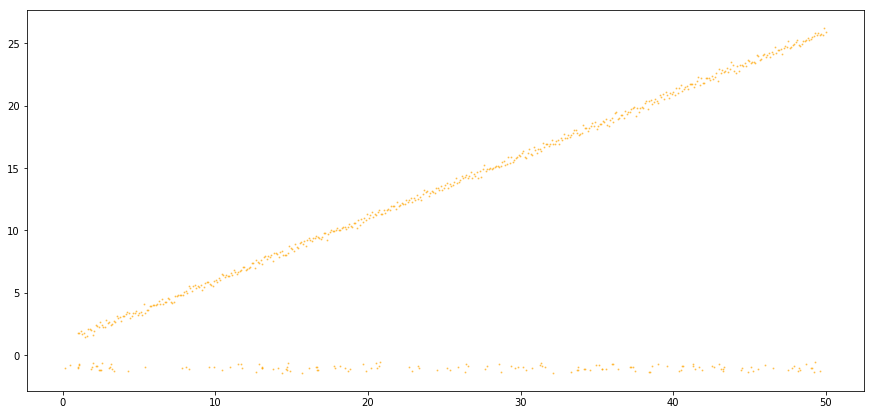

In [41]:
x = np.hstack((x, x_bad))
y = np.hstack((y, y_bad))
plt.figure(figsize=(15, 7))
plt.scatter(x, y, s=1, alpha=0.5, color="orange")
plt.show()

k, b = optimize.minimize(mse_fun, [0., 0.]).x
print "predicted values:\n", "k =", k, "\nb =", b
y_pred = k * x + b
plt.figure(figsize=(15, 7))
plt.plot(x, y_pred, color = "orange")
plt.scatter(x, y, s=1, alpha=0.5)
plt.show()

predicted values:
k = 0.498177590862 
b = 0.981737994036


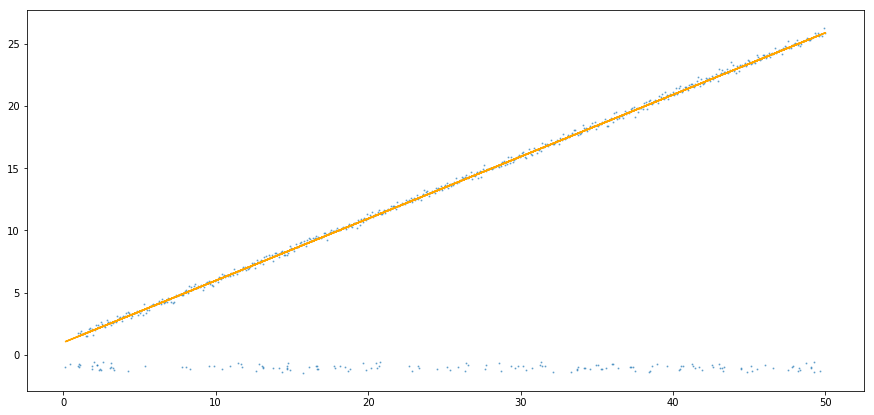

In [42]:
k, b = optimize.minimize(mae_fun, [0., 0.]).x
print "predicted values:\n", "k =", k, "\nb =", b
y_pred = k * x + b
plt.figure(figsize=(15, 7))
plt.plot(x, y_pred, color = "orange")
plt.scatter(x, y, s=1, alpha=0.5)
plt.show()

Из графиков видно, что с MAE, то восстановленная зависимость практически не зависит от выбросов, а с MSE оптимальная прямая сильнее подстраивается под выбросы, минимизируя MAE, мы оцениваем медиану выборки. Очевидно, что она не сильно чувствительна к выбросам.

##  Теоретические задачи

### #1

Если априорные вероятности классов одинаковые, а плотности распределения признаков в каждом классе $P(x^{(k)}|y)= \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x^{(k)} - \mu_{yk})}{2\sigma^2}}$, то получаем $P(y|X) \propto \prod_{i=1}^{\infty} P(x^{(k)}|y)$, $P(y|X) \propto exp\left(-\sum_{k=0}^{n}\frac{\left(x^{(k)} - \mu_{yk}\right)^2}{2\sigma^2}\right)$, таким образом, выражение будет достигать максимума при минимуме $\sum_{k=0}^{n}\left(x^{(k)} - \mu_{yk}\right)^2$. А это и есть формула расстояния от $X$ до $\mu_y$.

### #2

Для ROC-AUC имеем всего 3 порога: $0,0.5,1$.
В 1-м и 3-м случаях получаем соответственно точки (0, 0) и (1, 1). Осталось посчитать 2-ой случай.
Пусть в выборке размера $n$ у нас $an$ элементов 1-го класса.
Тогда TP в среднем равно $ nap$, потому что объектов 1-го класса $na$, и по условию с вероятностью $p$ мы даём правильный ответ.


В таком случае 
$FN = na (1 - p)$, 

$TN = n(1 - a)(1 - p)$, 

$FP = n(1 - a)p$

Из формул False positive rate и True negative rate: 

$Fpr = \frac{fp}{fp + tn} = \frac{n(1 - \alpha)p}{n(1 - \alpha)p + n(1 - \alpha)(1 - p)} = p$,
$Tpr = \frac{tp}{tp + fn} = \frac{n\alpha p}{n\alpha p + n\alpha (1 - p)} = p$

Получили, что точка, соответсвующая порогу 0.5 - (p, p). 
Итого, имеем точки (0,0), (p,p), (1,1), а это диагональ квадрата 1x1, т.е. ROC-AUC в среднем будет 0.5.

### #3

$E_{B} = min\{P(0|X), P(1|X)\}$ 

$E_{N} = P(y \ne y_n) = P(y_n = 1| x_n)P(0 | x) + P(y_n = 0| x_n)P(1 | x)$

Предполагаем, что $P(y|x)$ непрерывна по $x$. Пусть $l$ - размер выборки. 

Тогда $P(y_n|x_n) \to P(y_n|x)$ при $l \to \inf$. Значит $$E_{N} \approx 2P(1|x)P(0|x) \le 2min\{P(0|x), P(1|x)\} = 2E_{B}$$